In [42]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import rasterio as rst

In [ ]:
#funciones 


class vul_model:

    #constructor:
    def __init__(self, direccion):

        
        vul_model.direccion = direccion
        vul_model.arr = [f for f in os.listdir(direccion) if f.endswith('.tif')]

        #se cargan los rasters al modelo:
        print('cargando capas...')
        vul_model.rasters=[]

        for i in vul_model.arr: 
            self.dir= vul_model.direccion+'/'+i
            print('cargando: ', self.dir)
            vul_model.rasters.append( rst.open(self.dir).read(1))
        

        #get min values for rasters 
        self.shapes0=[]
        self.shapes1=[]
        for i in vul_model.rasters:
            self.shapes0.append(i.shape[0])
            self.shapes1.append(i.shape[1])
        vul_model.min1=min(self.shapes0)
        vul_model.min2=min(self.shapes1) 

        #filter raster
        print('filtrando rasters...')
        for i in range(0,len(vul_model.rasters)):
            vul_model.rasters[i]=vul_model.rasters[i][0:vul_model.min1,0:vul_model.min2]
        
        #get bounds
        print('obteniendo limites...')
        a=rst.open(vul_model.direccion +'/'+vul_model.arr[0])
        vul_model.bounds=[0,0]
        vul_model.bounds[0] = a.bounds[3]
        vul_model.bounds[1] = a.bounds[0] 

        print('carga finalizada...')


    #ver la lista de rasters cargados
    def print_raster_list(self):
        for i in vul_model.arr:
            print(i)


    #agregar la tabla de ponderaciones
    #path: direccion de la carpeta donde estan los rasters para hacer el analisis 
    def add_analisis(self, path): 
 
        vul_model.pond_table = pd.read_csv(path,encoding = 'unicode_escape')


    #cambiar ponderacion:
    #rast: es el raster al que se le cambia la ponderacion, formato str
    #pond: es la nueva ponderacion
    def pond_change(self, rast , pond): 
        vul_model.pond_table.loc[rast,'ponderacion'] = pond

    #imprimir solo un raster
    #rast_num: numero del raster que se desea graficar
    def plt_raster(sel, rast_num):   
        plt.figure(figsize = (30,20))
        plt.imshow(vul_model.rasters[rast_num])
        plt.colorbar()
        plt.show()

    #imprimir todos los rasters
    def print_all(self):
        self.col=3
        self.row= (int(len(vul_model.rasters)/3))+1

        fig, self.axs = plt.subplots(self.row, self.col,figsize=(15,15))

        self.nn = 0 

        for i in range(0,self.row):
            for j in range(0,self.col):

                if self.nn >len(vul_model.rasters)-1: 
                    break
                else:
                    self.axs[i,j].imshow(vul_model.rasters[self.nn])
                    self.axs[i,j].set_title(self.nn)
                    self.nn=self.nn+1

    #correr el analisis
    def run_raster_sum(self):

        vul_model.suma = np.zeros(vul_model.rasters[0].shape ,dtype=float)

        r= vul_model.pond_table.index
        p= vul_model.pond_table['ponderacion']
        for i in r:
            vul_model.suma = vul_model.suma + (vul_model.rasters[i] * p[i])
        print('raster_calc completa')

    #graficar el analisis
    def plt_sum(self):
        plt.figure(figsize = (30,20))
        plt.imshow(vul_model.suma)
        plt.colorbar()
        plt.show()


    #exportar el analisis
    #name: nombre del archivo de salida raster con todo y su extencion *.tif
    def exportar_raster(self,name):  

        self.path=vul_model.direccion+'/'+name
        transform = from_origin(vul_model.bounds[1],vul_model.bounds[0], 5, 5)

        new_dataset = rst.open(self.path, 
                                'w', 
                                driver='GTiff',
                                height = vul_model.suma.shape[0], 
                                width = vul_model.suma.shape[1],
                                count=1, 
                                dtype=str(vul_model.suma.dtype),
                                crs='+proj=utm +zone=11 +datum=WGS84 +units=m +no_defs' ,
                                transform=transform)

        new_dataset.write(vul_model.suma, 1)
        new_dataset.close()
        print('exportacion completa')









In [2]:
path ='C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/'
carpetas = os.listdir( path)
carpetas

['quimico', 'sanitario', 'socio organizativa']

In [4]:
path2 = path + carpetas[0]
archivos = os.listdir( path2)
archivos

['quimico.tif',
 'quimico_reesc.tif',
 'quim_EMPRESAS_SUSTANCIAS_PEL.tif',
 'quim_ESTACION_CARBURACION.tif',
 'quim_ESTACION_HIDROCARB_ALMACEN.tif',
 'quim_ESTACION_HIDROCARB_MEDYREG.tif',
 'quim_ESTACION_SERVICIO.tif',
 'quim_GASODUCTO.tif',
 'quim_INFRA_GAS_LP.tif',
 'quim_POLIDUCTO.tif',
 'quim_RIESGO_INCENDIOS_2021.tif',
 'quim_VIAS_FERREAS.tif']

In [21]:
rr =[]
for k in range(0,len(carpetas)):
    print('cargando capas de: '+ carpetas[k])
    print('  ')
    r = []
    path2 = path + carpetas[k]
    archivos = os.listdir( path2)
    for i in range(0,len(archivos)):
        print('cargando: '+path + path2+ '/' +archivos[i])
        r.append( rst.open(path2+ '/' +archivos[i]).read(1))

    rr.append(r)
print('ha terminado la carga')

cargando capas de: quimico
  
cargando: C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/quimico/quimico.tif
cargando: C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/quimico/quimico_reesc.tif
cargando: C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/quimico/quim_EMPRESAS_SUSTANCIAS_PEL.tif
cargando: C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/quimico/quim_ESTACION_CARBURACION.tif
cargando: C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/C:/Users/SIG01/Documents/IMPLAN/procesos/modelo de vulnerabilidad/rasters/quimico/quim_ESTACION_HIDROCARB_ALMACEN.tif
cargando: C

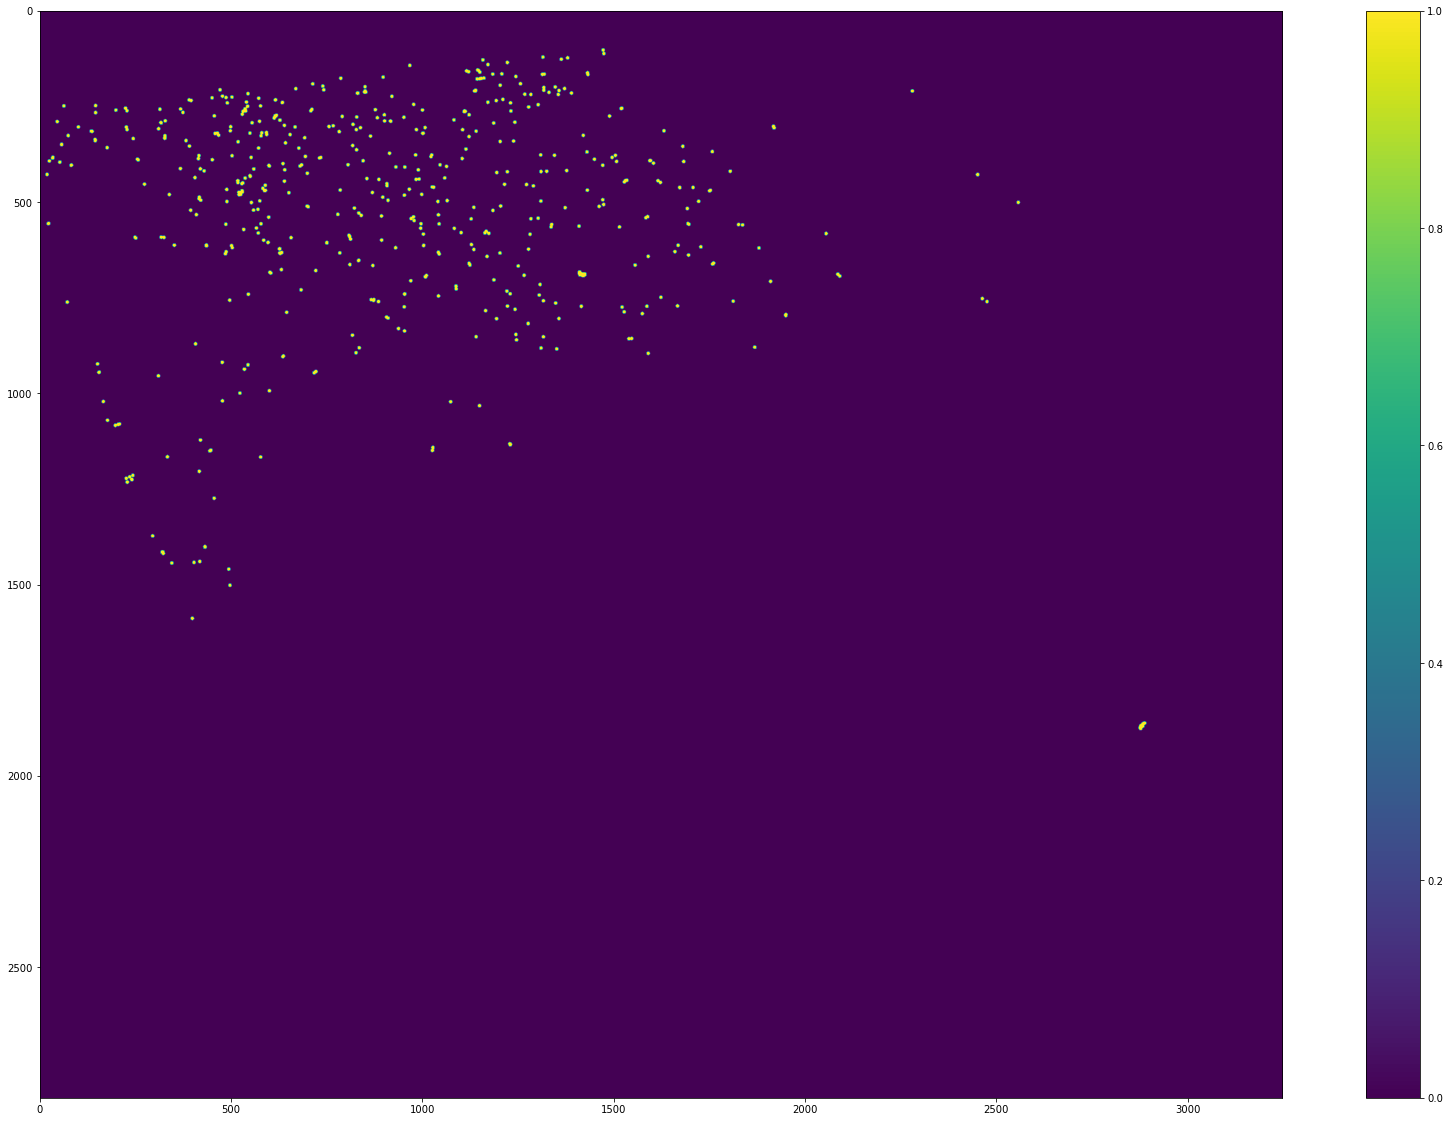

In [19]:
plt.figure(figsize = (30,20))
plt.imshow(rr[1][3])
plt.colorbar()
plt.show()

In [ ]:
rr[1][3]

In [35]:
shapes0=[]
shapes1=[]

for k in range(0,len(rr)):
    for i in rr[k]:
        shapes0.append(i.shape[0])
        shapes1.append(i.shape[1])

min1=min(shapes0)
min2=min(shapes1)


print(min1)
print(min2)

2842
3248


In [38]:
print('filtrando rasters...')

for k in range(0,len(rr)):
    for i in range(0,len(rr[k])):

        rr[k][i] = rr[k][i][0:min1,0:min2]
print('filtrados...')

filtrando rasters...
filtrados...


In [41]:


for k in range(0,len(rr)):
    print(len(rr[k]))






12
17
4


In [73]:
frames = []

for k in range(0,len(rr)):
    frames.append( pd.DataFrame(index=range(0,len(rr[k])), columns = ['rasters','rast_name','pond'] ))
    frames[k]['rasters'] = rr[k]
    


In [74]:
frames[2]

,rasters,rast_name,pond
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,NaN
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,NaN
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,NaN
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",NaN,NaN


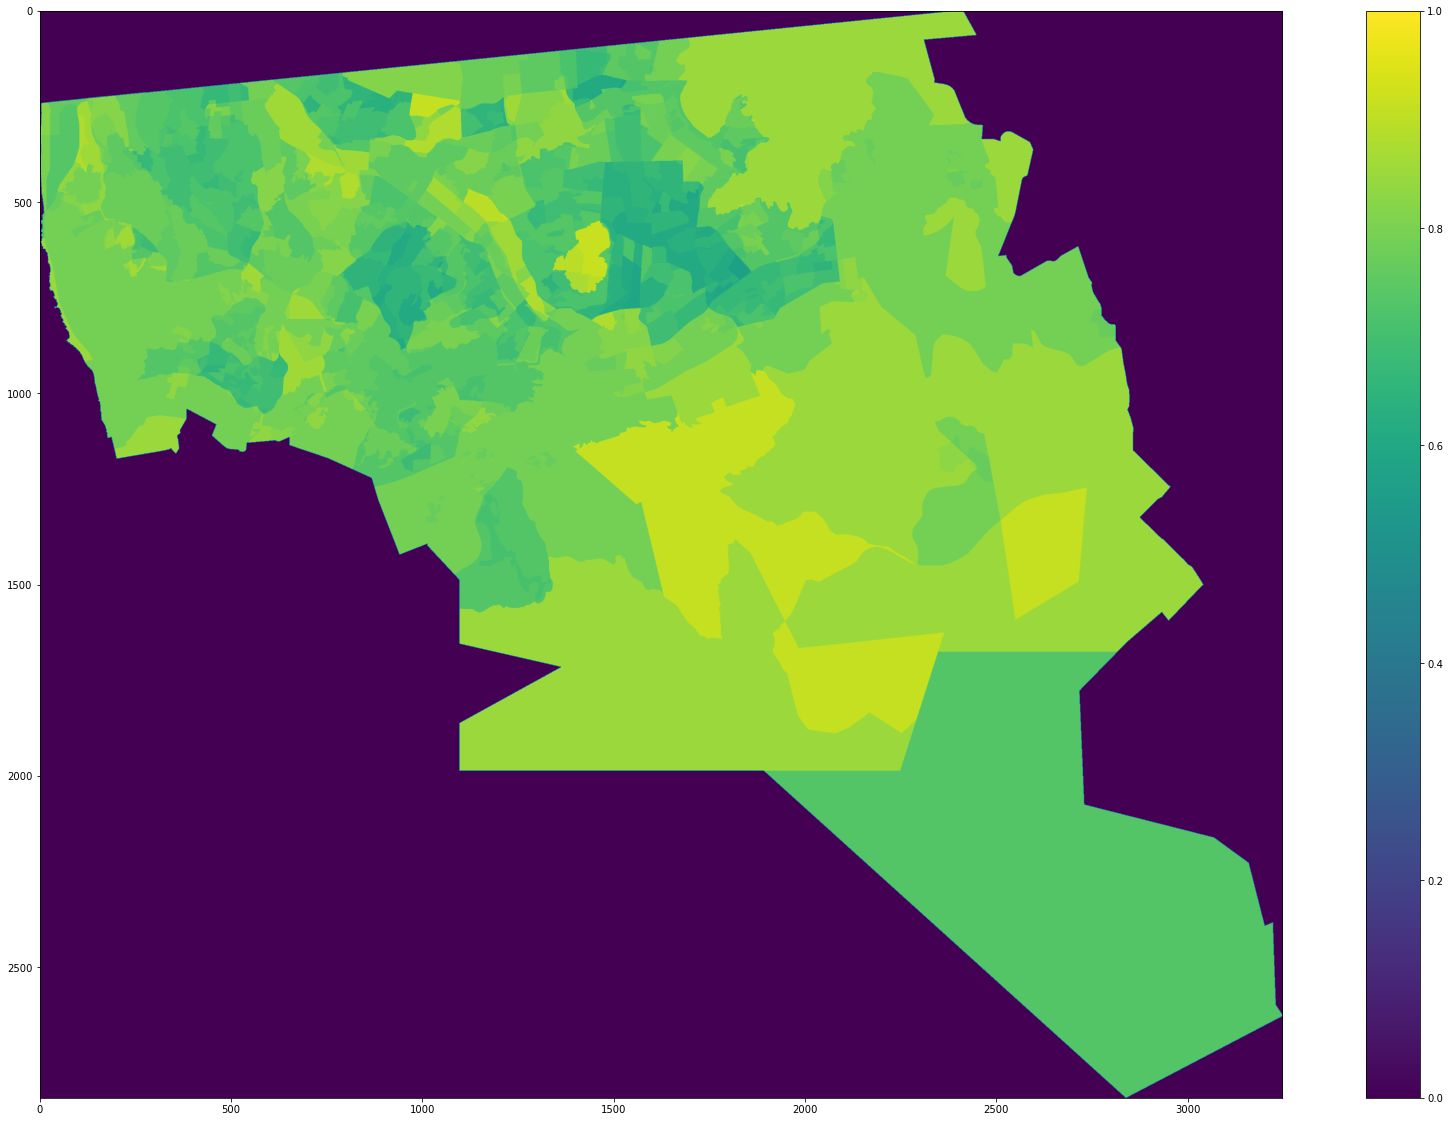

In [70]:
plt.figure(figsize = (30,20))
plt.imshow(frames[2]['rasters'][0])
plt.colorbar()
plt.show()

In [85]:
frames[2]['rasters'][0].reshape(1,-1)[0].tolist()


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [86]:
ElDataFrame = pd.DataFrame(columns=['col1','col2','col3'])
ElDataFrame

,col1,col2,col3


In [87]:
ElDataFrame['col1'] = frames[2]['rasters'][0].reshape(1,-1)[0].tolist()
ElDataFrame

,col1,col2,col3
0,0.0,NaN,NaN
1,0.0,NaN,NaN
2,0.0,NaN,NaN
3,0.0,NaN,NaN
4,0.0,NaN,NaN
...,...,...,...
9230811,0.0,NaN,NaN
9230812,0.0,NaN,NaN
9230813,0.0,NaN,NaN
9230814,0.0,NaN,NaN


In [89]:
frames[2]['rasters'][0].shape

(2842, 3248)

In [97]:
OMG =ElDataFrame['col1'].values.reshape(frames[2]['rasters'][0].shape)
OMG

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

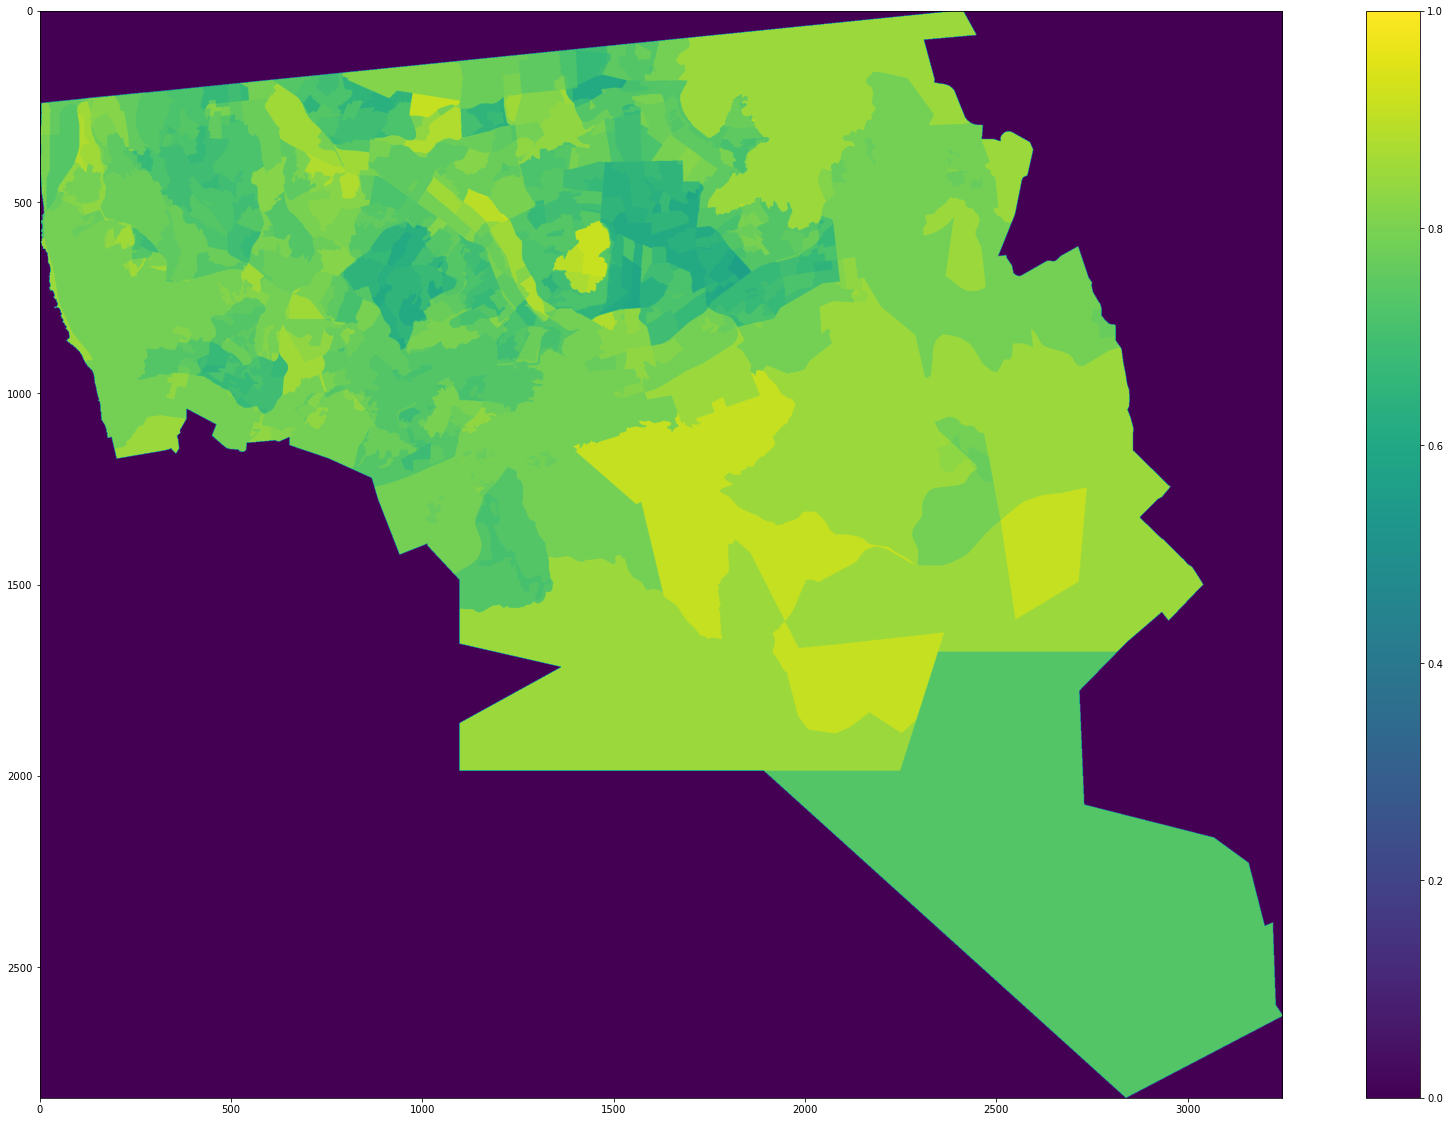

In [98]:
plt.figure(figsize = (30,20))
plt.imshow(OMG)
plt.colorbar()
plt.show()